In [78]:
import pandas as pd
import seaborn as sns
from textblob import TextBlob
import nltk, re
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer ,TfidfTransformer
import seaborn as sns
from numpy import argsort, asarray, array

In [2]:
df = pd.read_csv('clean_nus_sms.csv')
df.head()

,Unnamed: 0,id,Message,length,country,Date
0,0,10120,Bugis oso near wat...,21,SG,2003/4
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4
4,4,10124,Meet after lunch la...,22,SG,2003/4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48598 entries, 0 to 48597
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48598 non-null  int64 
 1   id          48598 non-null  int64 
 2   Message     48595 non-null  object
 3   length      48598 non-null  object
 4   country     48598 non-null  object
 5   Date        48598 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.2+ MB


In [4]:
df.describe()

,Unnamed: 0,id
count,48598.000000,48598.000000
mean,27138.722355,21106.315342
std,16206.056352,12189.313543
min,0.000000,1.000000
25%,12852.250000,12100.000000
50%,26916.500000,18553.000000
75%,40080.500000,29964.500000
max,55834.000000,45718.000000


In [5]:
df['Message'].isna().sum()

3

In [6]:
df = df.dropna(how='any',axis=0) 

In [7]:
print(df['Message'][6])

5 nights...We nt staying at port step liao...Too ex


In [8]:
print(df['country'].unique())

['SG' 'MY' 'India' 'Pakistan' 'United States' 'Canada' 'unknown' 'Serbia'
 'United Kingdom' 'France' 'Singapore' 'China' 'Malaysia' 'Sri Lanka'
 'Spain' 'Bangladesh' 'Philippines' 'Macedonia' 'Romania' 'Kenya'
 'Slovenia' 'New Zealand' 'Nigeria' 'Ghana' 'Indonesia' 'Nepal' 'Morocco'
 'USA' 'Lebanon' 'india' 'Trinidad and Tobago' 'INDIA' 'srilanka'
 'jamaica' 'Hungary' 'Australia' 'Italia' 'BARBADOS' 'Turkey' 'UK']


In [9]:
print(df['Date'].unique())

['2003/4' '2010/11' '2010/12' '2011/1' '2011/2' '2011/3' '2011/4' '2011/5'
 '2011/6' '2011/8' '2011/9' '2011/11' '2011/12' '2012/2' '2012/3' '2012/4'
 '2012/5' '2012/6' '2012/7' '2012/8' '2012/10' '2013/5' '2014/9' '2014/11'
 '2014/12' '2015/2' '2015/3']


In [10]:
df.country = df['country'].str.lower()

In [11]:
df.country = df['country'].replace(['united states'],'usa')
df.country = df['country'].replace(['sg'],'singapore')
df.country = df['country'].replace(['my'],'malaysia')
df.country = df['country'].replace(['united kingdom'],'uk')
df.country = df['country'].replace(['united kingdom'],'uk')
df.country = df['country'].replace(['italia'],'italy')
df.country = df['country'].replace(['new zealand'],'newzealand')

In [12]:
print(df['country'].unique())
print(len(df['country'].unique()))

['singapore' 'malaysia' 'india' 'pakistan' 'usa' 'canada' 'unknown'
 'serbia' 'uk' 'france' 'china' 'sri lanka' 'spain' 'bangladesh'
 'philippines' 'macedonia' 'romania' 'kenya' 'slovenia' 'newzealand'
 'nigeria' 'ghana' 'indonesia' 'nepal' 'morocco' 'lebanon'
 'trinidad and tobago' 'srilanka' 'jamaica' 'hungary' 'australia' 'italy'
 'barbados' 'turkey']
34


In [13]:
print(df['country'].value_counts())

singapore              31817
india                   7085
usa                     5680
sri lanka               1017
malaysia                 767
pakistan                 751
unknown                  602
canada                   198
bangladesh               126
china                    107
philippines               67
indonesia                 48
uk                        40
nepal                     39
srilanka                  30
hungary                   28
serbia                    22
kenya                     20
ghana                     18
italy                     10
nigeria                   10
newzealand                10
trinidad and tobago       10
turkey                    10
lebanon                   10
slovenia                  10
macedonia                 10
australia                  9
romania                    9
morocco                    9
barbados                   8
jamaica                    8
france                     5
spain                      5
Name: country,

In [14]:
df = df[df.country != 'unknown']
print(df['country'].value_counts())

singapore              31817
india                   7085
usa                     5680
sri lanka               1017
malaysia                 767
pakistan                 751
canada                   198
bangladesh               126
china                    107
philippines               67
indonesia                 48
uk                        40
nepal                     39
srilanka                  30
hungary                   28
serbia                    22
kenya                     20
ghana                     18
slovenia                  10
nigeria                   10
turkey                    10
lebanon                   10
italy                     10
macedonia                 10
newzealand                10
trinidad and tobago       10
morocco                    9
romania                    9
australia                  9
jamaica                    8
barbados                   8
spain                      5
france                     5
Name: country, dtype: int64


In [45]:
df.shape

(47993, 9)

In [46]:
def sentiment_analysis(df):
    def getSubjectivity(text):
        return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
    def getPolarity(text):
        return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
    print(df['Message'][0])
    df['TextBlob_Subjectivity'] =  df['Message'].apply(getSubjectivity)
    df['TextBlob_Polarity'] = df['Message'].apply(getPolarity)
    def getAnalysis(score):
        if score < 0:
            return 'Negative'
        elif score == 0:
            return 'Neutral'
        else:
            return 'Positive'
    df['TextBlob_Analysis'] = df['TextBlob_Polarity'].apply(getAnalysis)
    return df

In [47]:
sentiment_analysis(df)

Bugis oso near wat...


,Unnamed: 0,id,Message,length,country,Date,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,0,10120,Bugis oso near wat...,21,singapore,2003/4,0.400000,0.100000,Positive
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,singapore,2003/4,0.762500,0.150000,Positive
2,2,10122,I dunno until when... Lets go learn pilates...,46,singapore,2003/4,0.000000,0.000000,Neutral
3,3,10123,Den only weekdays got special price... Haiz......,140,singapore,2003/4,0.785714,0.178571,Positive
4,4,10124,Meet after lunch la...,22,singapore,2003/4,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...
48593,55828,45712,Come to me AFTER NOON,21,serbia,2015/3,0.000000,0.000000,Neutral
48594,55830,45714,I LOVE YOU TOO,14,serbia,2015/3,0.600000,0.500000,Positive
48595,55831,45715,C-YA,4,serbia,2015/3,0.000000,0.000000,Neutral
48596,55833,45717,BE MY GUEST,11,serbia,2015/3,0.000000,0.000000,Neutral


<AxesSubplot:xlabel='TextBlob_Analysis', ylabel='Count'>

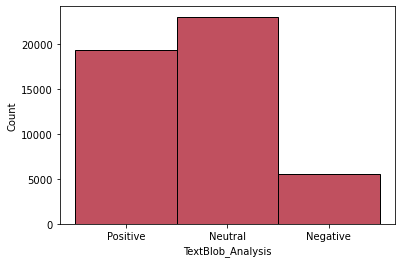

In [75]:
sns.set_palette(sns.color_palette("RdBu", 10))
sns.histplot(df.TextBlob_Analysis)

In [48]:
stop_words = stopwords.words('english')
extrawords= ["haha","lol","ok","u","im","okay","hahaha","ur","2","one","oh","hey","like","le","dont","yeah","wan","still","later","sorry","hi","also","na","ya","eh","thanks","e","lor","r","n","ah","4","wat","k","leh","really","dun","lah","la"]
stop_words.extend(extrawords)
normalizer = WordNetLemmatizer()

def get_part_of_speech(word):
  probable_part_of_speech = wordnet.synsets(word)
  pos_counts = Counter()
  pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
  pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
  pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
  pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
  most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
  return most_likely_part_of_speech

def preprocess_text(text):
  cleaned = re.sub(r'\W+', ' ', text).lower()
  tokenized = word_tokenize(cleaned)
  normalized = [normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized]
  statement_no_stop = [word for word in normalized if word not in stop_words]

  return statement_no_stop

In [49]:
print(processed_text[1])

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'great', 'world', 'buffet', 'cine', 'get', 'amore']


In [50]:
text_all =[]
for i in df['Message']:
    text_all.append(i)
processed_text = [preprocess_text(i) for i in text_all]

In [51]:
wordcounts= Counter([ele.lower() for sublst in processed_text for ele in sublst])
most_common= wordcounts.most_common(10)
print(most_common)

[('go', 5341), ('get', 4190), ('come', 2207), ('time', 2166), ('late', 2056), ('think', 1835), ('meet', 1664), ('see', 1515), ('want', 1426), ('know', 1405)]


In [80]:
untokenized= [" ".join(lst).lower() for lst in processed_text]
vectorizer= TfidfVectorizer()
tfidf=vectorizer.fit_transform(untokenized)

#Finding 10 words with the highest tf-idf scores
tfidf_feature_names = array(vectorizer.get_feature_names())
importance = argsort(asarray(tfidf.sum(axis=0)).ravel())[::-1]
top_10_words= tfidf_feature_names[importance[:10]]
print(top_10_words)

['go' 'get' 'come' 'late' 'time' 'meet' 'think' 'see' 'call' 'home']


In [86]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'


['Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral']


<AxesSubplot:ylabel='Count'>

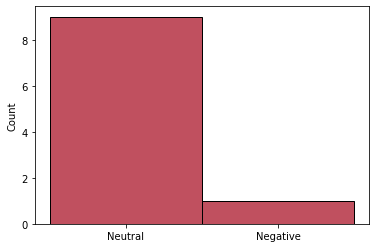

In [90]:
top_10_score = [TextBlob(text).sentiment.polarity for text in top_10_words]
top_10_analysis = [getAnalysis(i) for i in top_10_score]
print(top_10_analysis)
sns.histplot(top_10_analysis)

The 10 most frequent words across the corpus were:['go','get','come','time','think','see','want','know','need','take'].

The 10 words with the highest tf-idf scores were: ['go', 'get', 'come', 'time', 'see', 'call', 'home', 'think','know', 'want'].

Words such as "go", "time" and "see" suggest that many text messages are written to organise events such as meetups.

Words such as "call" and "home" suggest that users like to know when to expect their loved ones to either arrive or return home.

Words such as "know" and "want" suggest that users often request things through text messages.